
This program required you too have both latest R and python installed on your computer. Make sure that R environment has DESeq2, edgeR, limma, Biobase and other libaries that appear below installed. Also have modules such as panda, matplotlib, seaborn, rpy2 etc. are installed on python.

In [1]:
#!pip install bioinfokit
#!pip install rpy2
#!pip install ipyparallel  
#!conda install tensorflow

In [2]:
import the python modules

SyntaxError: invalid syntax (<ipython-input-2-cca3bf233470>, line 1)

In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


importing rpy2 objects in python

In [4]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector





In [5]:

from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')

# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
#%Rdevice png
%load_ext rpy2.ipython




Let us now load the R libraries

In [6]:
%%R

    library(DESeq2)
    library(edgeR)
    library(limma)
    library(Biobase)
    library(dplyr)

R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, 

Now you have to provide the file path where the data is loaded. 

In [7]:
%%R       
        load("/home/srivastava/Documents/HTSeq_Example/gilad_eset.RData")
        data <- gilad.eset
        head(data)
        print(data)


ExpressionSet (storageMode: lockedEnvironment)
assayData: 52580 features, 6 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: SRX014818and9 SRX014820and1 ... SRX014828and9 (6 total)
  varLabels: sample.id num.tech.reps gender
  varMetadata: labelDescription
featureData
  featureNames: ENSG00000000003 ENSG00000000005 ... LRG_99 (52580
    total)
  fvarLabels: gene
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  


In [8]:
%%R
        cpm.mat <- log(cpm(exprs(data)))
        mean.vec <- apply(cpm.mat, 1, mean)
        sdvec <- apply(cpm.mat, 1, sd)

#%R ('cpm.mat %>% head()')




Next we would make a sd vs average logCPM plot

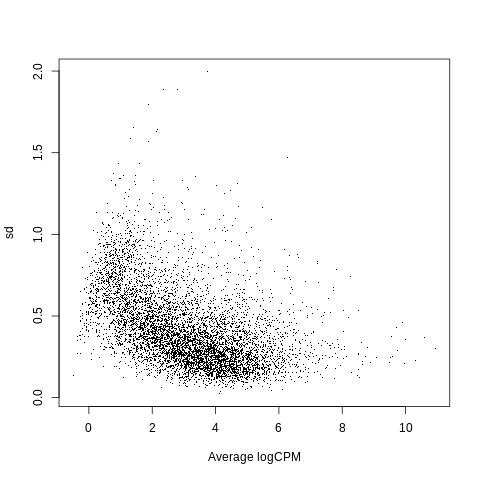

In [9]:
%R plot(mean.vec, sdvec, pch =".", ylab="sd", xlab="Average logCPM")

Let us now make a dispersion plot

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



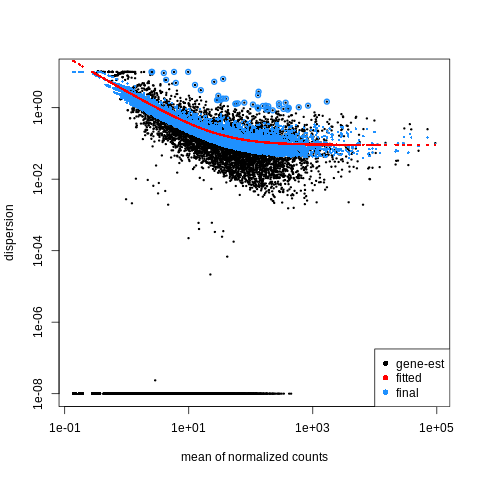

In [10]:
%%R  
    colnames(data)
    dds <- DESeqDataSetFromMatrix(countData = exprs(data), colData = pData(data), design = ~gender)
    dds <- DESeq(dds)
    plotDispEsts(dds)

In [11]:
%R -o dds
dds
print(dds)
%R ddsDF <- results(dds)
%R -o ddsDF
print(ddsDF)

class: DESeqDataSet 
dim: 52580 6 
metadata(1): version
assays(4): counts mu H cooks
rownames(52580): ENSG00000000003 ENSG00000000005 ... LRG_98 LRG_99
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(6): SRX014818and9 SRX014820and1 ... SRX014826and7
  SRX014828and9
colData names(4): sample.id num.tech.reps gender sizeFactor

log2 fold change (MLE): gender M vs F 
Wald test p-value: gender M vs F 
DataFrame with 52580 rows and 6 columns
                 baseMean log2FoldChange     lfcSE       stat    pvalue
                <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSG00000000003  38.48617      -0.636080  0.633874 -1.0034813  0.315629
ENSG00000000005   0.00000             NA        NA         NA        NA
ENSG00000000419  16.53149      -0.045982  0.609659 -0.0754225  0.939879
ENSG00000000457  26.40137       0.171818  0.476003  0.3609608  0.718129
ENSG00000000460   1.95259       0.805282  1.602610  0.5024813  0.615329
...                   ...            

In [12]:
type(ddsDF)
%R resultDds <- results(dds)
%R resultDds <- as.data.frame(resultDds)
%R -o resultDds
type(resultDds)

pandas.core.frame.DataFrame

In [13]:
resultDds.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,38.486166,-0.636080,0.633874,-1.003481,0.315629,0.999979
ENSG00000000005,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000000419,16.531493,-0.045982,0.609659,-0.075422,0.939879,0.999979
ENSG00000000457,26.401368,0.171818,0.476003,0.360961,0.718129,0.999979
ENSG00000000460,1.952594,0.805282,1.602610,0.502481,0.615329,0.999979


In [14]:
resultDds.drop_duplicates()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,38.486166,-0.636080,0.633874,-1.003481,0.315629,0.999979
ENSG00000000005,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000000419,16.531493,-0.045982,0.609659,-0.075422,0.939879,0.999979
ENSG00000000457,26.401368,0.171818,0.476003,0.360961,0.718129,0.999979
ENSG00000000460,1.952594,0.805282,1.602610,0.502481,0.615329,0.999979
...,...,...,...,...,...,...
ENSG00000254122,13.566756,-0.624627,0.620136,-1.007241,0.313819,0.999979
ENSG00000254128,1.354613,1.545178,1.897659,0.814255,0.415499,0.999979
ENSG00000254206,4.289691,1.362863,1.013185,1.345128,0.178584,0.999979
ENSG00000254221,2.276256,0.296591,1.427451,0.207777,0.835403,0.999979


In [15]:
(resultDds['pvalue'] <= 0.05) 

ENSG00000000003    False
ENSG00000000005    False
ENSG00000000419    False
ENSG00000000457    False
ENSG00000000460    False
                   ...  
LRG_94             False
LRG_96             False
LRG_97             False
LRG_98             False
LRG_99             False
Name: pvalue, Length: 52580, dtype: bool

In [16]:
(resultDds['log2FoldChange'] >= 0)

ENSG00000000003    False
ENSG00000000005    False
ENSG00000000419    False
ENSG00000000457     True
ENSG00000000460     True
                   ...  
LRG_94             False
LRG_96             False
LRG_97             False
LRG_98             False
LRG_99             False
Name: log2FoldChange, Length: 52580, dtype: bool

In [17]:
resultDds05 = resultDds[resultDds['pvalue'] <= 0.05]
#(resultDds['log2FoldChange'] >= 0)

In [18]:
resultDds05[resultDds05['log2FoldChange'] >= 5]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000129824,35.864006,6.103900,3.085011,1.978567,0.047865,0.999979
ENSG00000138131,365.293870,5.045004,1.393825,3.619540,0.000295,0.388019


In [19]:
resultDds05[resultDds05['log2FoldChange'] >= 5]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000129824,35.864006,6.103900,3.085011,1.978567,0.047865,0.999979
ENSG00000138131,365.293870,5.045004,1.393825,3.619540,0.000295,0.388019


In [20]:
resultDds05[resultDds05['log2FoldChange'] >= 5].max()

baseMean          365.293870
log2FoldChange      6.103900
lfcSE               3.085011
stat                3.619540
pvalue              0.047865
padj                0.999979
dtype: float64

In [21]:
resultDds05[resultDds05['log2FoldChange'] >= 5].dtypes

baseMean          float64
log2FoldChange    float64
lfcSE             float64
stat              float64
pvalue            float64
padj              float64
dtype: object

In [22]:
from bioinfokit import analys, visuz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


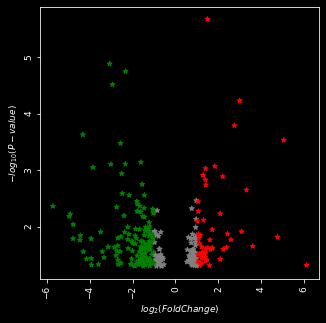

In [23]:
df = resultDds05
visuz.gene_exp.volcano(df=df, lfc='log2FoldChange', pv='pvalue', theme='dark', color=("red", "grey", "green"), markerdot='*', dotsize=25, show=True)

In [24]:
geneID = resultDds05.index.tolist()
%R -i geneID 
%R gene.list <- as.character(geneID)
%R gene.list
#%R gene.list[3]

'ENSG0000...,'ENSG0000...,'ENSG0000...,...,'ENSG0000...,'ENSG0000...,'ENSG0000...


In [25]:
%%R
    library(mygene)
    geneName <- getGenes(gene.list, fields='symbol')
    geneName

R[write to console]: Loading required package: GenomicFeatures

R[write to console]: Loading required package: AnnotationDbi

R[write to console]: 
Attaching package: ‘AnnotationDbi’


R[write to console]: The following object is masked from ‘package:dplyr’:

    select




DataFrame with 279 rows and 5 columns
              query         _id X_version      symbol  notfound
        <character> <character> <integer> <character> <logical>
1   ENSG00000002834        3927         4       LASP1        NA
2   ENSG00000003249       79007         3      DBNDD1        NA
3   ENSG00000006210        6376         9      CX3CL1        NA
4   ENSG00000008323       55200         2     PLEKHG6        NA
5   ENSG00000008517        9235         5        IL32        NA
...             ...         ...       ...         ...       ...
275 ENSG00000215256       55449         1   DHRS4-AS1        NA
276 ENSG00000216588      147710         1      IGSF23        NA
277 ENSG00000242220      140290         4      TCP10L        NA
278 ENSG00000242574        3109         2     HLA-DMB        NA
279 ENSG00000244734        3043         5         HBB        NA


In [26]:
%R listGeneName <- geneName$symbol
%R -o listGeneName
print(listGeneName)

  [1] "LASP1"     "DBNDD1"    "CX3CL1"    "PLEKHG6"   "IL32"      "CD22"     
  [7] "GPRC5A"    "SNAI2"     "ALAS1"     "EHD2"      "HSPA5"     "H6PD"     
 [13] "PLEKHH1"   "TMCC3"     "CREB3L3"   "PFN2"      "CDH19"     "IRAG1"    
 [19] "MKRN2"     "MCAM"      "FDFT1"     "PTPRH"     "HSP90AA1"  "IRAK3"    
 [25] "EFNB1"     "RFFL"      "BAMBI"     "TREM2"     "EFNA2"     NA         
 [31] "CDHR5"     "OSM"       "MMP9"      "OXT"       "MYOM1"     "CHRDL1"   
 [37] "SRPX"      "F9"        "FLT1"      "NECAB2"    "CRISPLD2"  "MEFV"     
 [43] "TOX3"      "MAZ"       "RASL12"    "RETN"      "CLEC4M"    "PLA2G4C"  
 [49] "JAK3"      "CLDN15"    "PSMA2"     "OGN"       "ASPN"      "MINPP1"   
 [55] "ACTA2"     "TNFAIP1"   "CRYAB"     "APOA4"     "RNF141"    "POU2AF1"  
 [61] "MGP"       "IFNG"      "ENO2"      "LDHB"      "VNN2"      "ACVR2B"   
 [67] "IGFBP5"    "GNLY"      "MMP8"      "TCF21"     "FGF23"     "ZC2HC1C"  
 [73] "PPP1R3C"   "GNA13"     "TMPO"      "HS3ST2"    "SRGN"    

In [27]:
resultDds05['GeneName'] = listGeneName
resultDds05

<ipython-input-27-2c4f64a33c02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultDds05['GeneName'] = listGeneName


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
ENSG00000002834,36.797449,0.963482,0.470134,2.049375,0.040425,0.999979,LASP1
ENSG00000003249,65.893079,2.988309,0.744210,4.015411,0.000059,0.124832,DBNDD1
ENSG00000006210,195.905358,0.962956,0.359309,2.680021,0.007362,0.999979,CX3CL1
ENSG00000008323,14.800023,1.280345,0.605227,2.115480,0.034389,0.999979,PLEKHG6
ENSG00000008517,273.532925,1.508017,0.666956,2.261044,0.023757,0.999979,IL32
...,...,...,...,...,...,...,...
ENSG00000215256,47.778264,-1.224522,0.518542,-2.361473,0.018203,0.999979,DHRS4-AS1
ENSG00000216588,23.506956,1.712557,0.676110,2.532956,0.011311,0.999979,IGSF23
ENSG00000242220,6.314970,2.081923,1.000790,2.080281,0.037500,0.999979,TCP10L
ENSG00000242574,31.791989,1.221171,0.536003,2.278291,0.022709,0.999979,HLA-DMB


In [28]:
resultDds05[resultDds05['log2FoldChange'] >= 0]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneName
ENSG00000002834,36.797449,0.963482,0.470134,2.049375,0.040425,0.999979,LASP1
ENSG00000003249,65.893079,2.988309,0.744210,4.015411,0.000059,0.124832,DBNDD1
ENSG00000006210,195.905358,0.962956,0.359309,2.680021,0.007362,0.999979,CX3CL1
ENSG00000008323,14.800023,1.280345,0.605227,2.115480,0.034389,0.999979,PLEKHG6
ENSG00000008517,273.532925,1.508017,0.666956,2.261044,0.023757,0.999979,IL32
...,...,...,...,...,...,...,...
ENSG00000214063,114.527296,0.779046,0.389764,1.998765,0.045634,0.999979,TSPAN4
ENSG00000214456,173.946616,1.060871,0.380995,2.784473,0.005361,0.999979,PLIN5
ENSG00000216588,23.506956,1.712557,0.676110,2.532956,0.011311,0.999979,IGSF23
ENSG00000242220,6.314970,2.081923,1.000790,2.080281,0.037500,0.999979,TCP10L


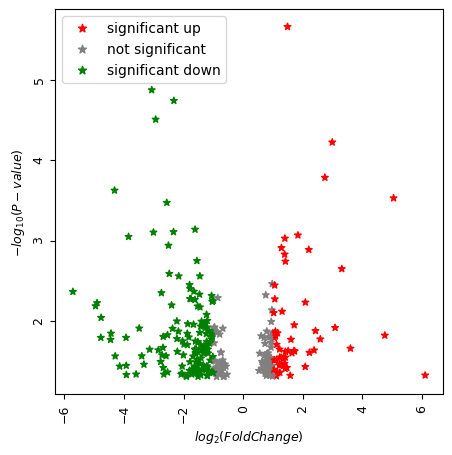

In [29]:
df = resultDds05
visuz.gene_exp.volcano(df=df, lfc='log2FoldChange', pv='pvalue',  color=("red", "grey", "green"), markerdot='*', plotlegend=True, dotsize=25, show=True)

/home/srivastava/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/srivastava/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/srivastava/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:586: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


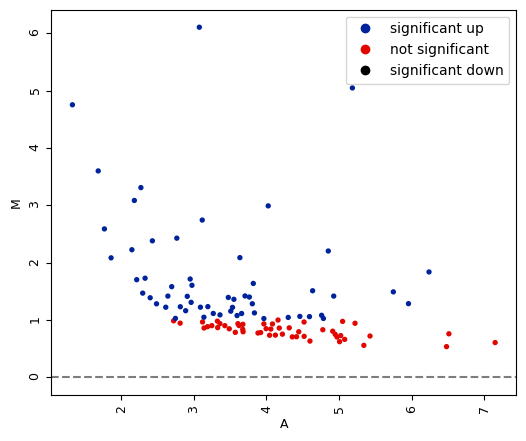

In [30]:
visuz.gene_exp.ma(df=df, lfc='log2FoldChange', ct_count='baseMean', st_count='stat', plotlegend=True, 
    color=('#00239CFF', 'grey', '#E10600FF'), show=True)

In [78]:
%R queryGeneName <- geneName$query
%R -o queryGeneName
%R queryGeneName
#print(queryGeneName)

'ENSG0000...,'ENSG0000...,'ENSG0000...,...,'ENSG0000...,'ENSG0000...,'ENSG0000...


In [79]:
%R exprsData <- exprs(data)
%R cpmMat <- cpm.mat
%R -o cpmMat
%R exprsData <-  as.data.frame(exprsData)
%R -o exprsData

In [80]:
exprsData
%R exprsData[rownames(exprsData) == queryGeneName[23],]
#%R rownames(exprsData)

,SRX014818and9,SRX014820and1,SRX014822and3,SRX014824and5,SRX014826and7,SRX014828and9
ENSG00000080824,15,5,20,1,5,5


array([279], dtype=int32)

In [115]:
%%R
    dataFrameNew = 0
    x = length(queryGeneName )
    i = 1
    while (i <= x ){
    dataFrameNew = rbind(exprsData[rownames(exprsData) == queryGeneName[i],], dataFrameNew)
    i = i +1
    
    }


In [117]:
%R dataFrameNew = dataFrameNew[1:x,]
%R dataFrameNew


,SRX014818and9,SRX014820and1,SRX014822and3,SRX014824and5,SRX014826and7,SRX014828and9
ENSG00000244734,201.0,31.0,260.0,9.0,15.0,48.0
ENSG00000242574,17.0,22.0,16.0,63.0,44.0,27.0
ENSG00000242220,4.0,0.0,3.0,14.0,11.0,6.0
ENSG00000216588,13.0,11.0,8.0,13.0,25.0,81.0
ENSG00000215256,102.0,59.0,34.0,18.0,51.0,25.0
...,...,...,...,...,...,...
ENSG00000008517,64.0,104.0,245.0,652.0,99.0,422.0
ENSG00000008323,7.0,11.0,7.0,16.0,19.0,32.0
ENSG00000006210,90.0,133.0,162.0,229.0,381.0,218.0
ENSG00000003249,14.0,6.0,23.0,89.0,22.0,258.0


In [118]:
%R -o dataFrameNew
#type(dataFrameNew)

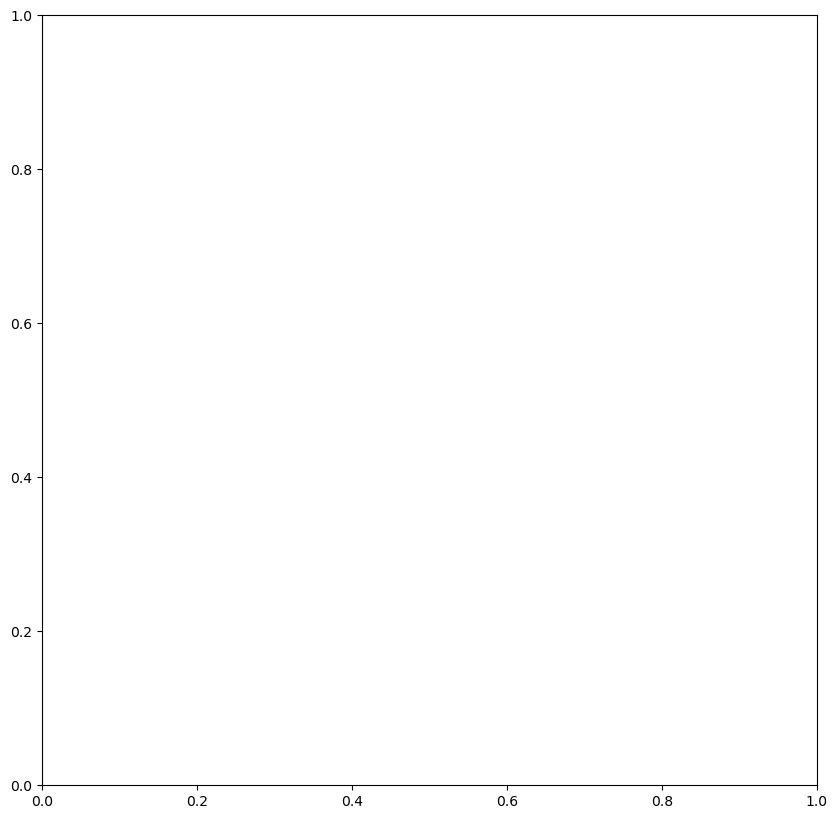

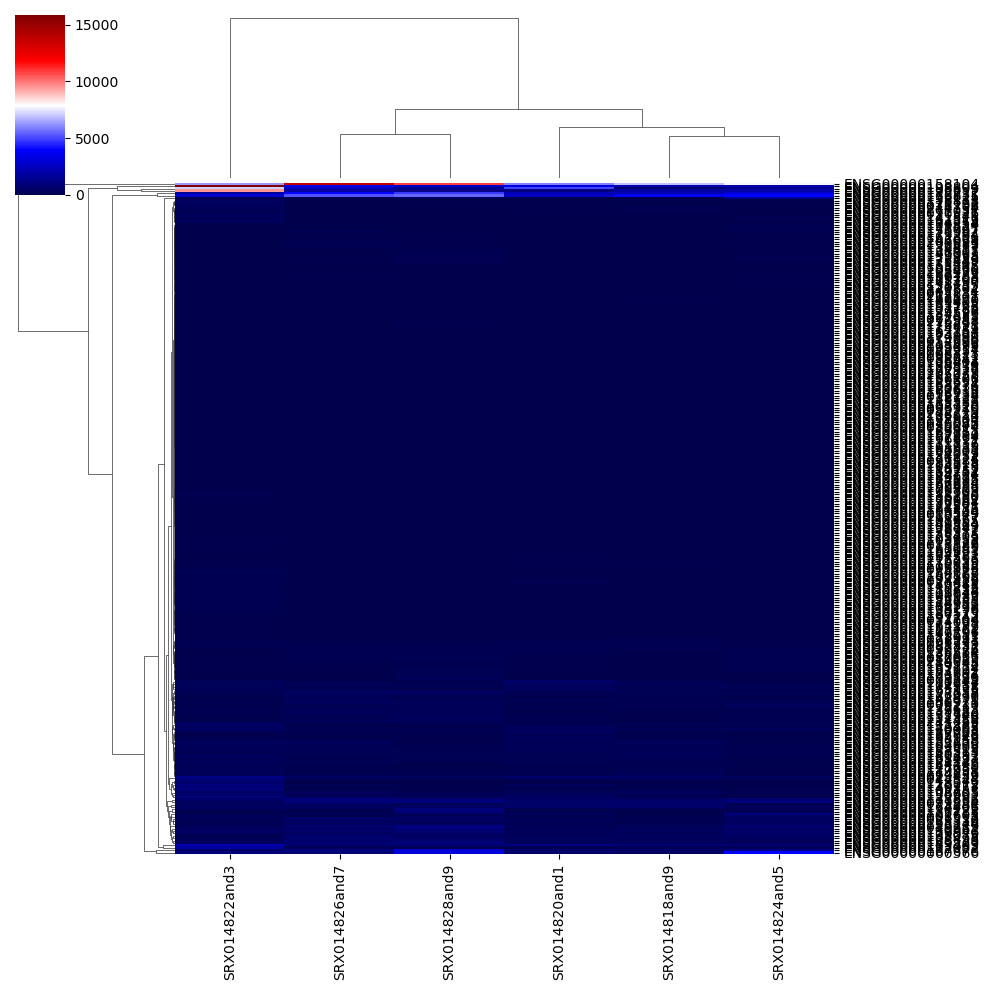

In [124]:
dfHm = dataFrameNew

visuz.gene_exp.hmap(df=dfHm, dim=(10, 10), show=True)

visuz.gene_exp.hmap(df=dfHm, rowclus=False, colclus=False, dim=(3, 6), tickfont=(6, 4))